# Week 5: Data Manipulation

**Sources:**

- Data Science for Marketing Analytics, by Tommy Blanchard, Debasish Behera, and Pranshu Bhatnagar. Packt Publishing, 2019.
- https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99
- https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby
- https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231
- https://www.geeksforgeeks.org/python-map-function/
- https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/
- https://www.textbook.ds100.org/intro.html
- https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# use ggplot style when plotting
plt.style.use('ggplot')

# set the plot figure size to 10x6
plt.rcParams["figure.figsize"]=10,6

# 5. Data Manipulation

We can do the following operations to manipulate our data: 

- **select** a specific variable or set of variables, a row or a set of rows using indexes.
- **filter** rows to obtain a subest of a dataframe based on a given condition
- **arrange** the dataframe by index or variable
- **group** the data by the levels of a given categorical variable and perform analysis on each group seperately
- **mutate** and transform a variable into a new variable 
- **summarise** and reduce a variable to a summary variable (e.g median).


## 5.1 Selecting Data (Columns and Rows)

In [4]:
# read the sales.csv dataset and save in a variable called sales

sales = pd.read_csv("sales.csv")
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The following table, summarizes how to select rows and columns in the data: 

|**Operation**|**Syntax**|**Result**|
|:--------------|:----------------|:-----------------|
Select a column | `df['colname']` | Series
Select multiple columns | `df[['colname1', 'colname2', ...]]` | DataFrame
Select a row by integer index location | `df.iloc[index_location]` | Series
Slice rows |`df.iloc[start_index:end_index+1]`| DataFrame
Select multiple columns by index location |`df.iloc[,start_index:end_index+1]`| DataFrame
Slice rows and select multiple columns by index location | `df.iloc[start_index:end_index+1, start_index:end_index+1]`| DataFrame

### 5.1.1 Selecting Column(s)

In [3]:
# Selecting a column

# What is the total revenue for all years?
sales['Revenue'].sum()

627745954.4599999

In [4]:
## What is the difference between total revenue and total planned revenue for all sales?

sales['Revenue'].sum() - sales['Planned revenue'].sum()

-12373078.25

In [5]:
# Selecting multiple columns 

# Create a mini dataframe that has the values for the 
# Product, Revenue, and Planned revenue

type(sales[['Product', 'Revenue', 'Planned revenue']])

pandas.core.frame.DataFrame

In [6]:
# Using indexing techniques, create a mini dataframe that has 
# the values for the Product, Revenue, and Planned revenue

#sales[['Product', 'Revenue', 'Planned revenue']]

# df[ROWs, COLUMNS]
sales.iloc[:,[3,6,7]].head()
# OR
#sales.iloc[[3, 6,7]]

,Product,Revenue,Planned revenue
0,Course Pro Golf and Tee Set,5819.70,6586.16
1,Course Pro Golf and Tee Set,NaN,NaN
2,Course Pro Golf and Tee Set,10904.28,11363.52
3,Course Pro Golf and Tee Set,27987.84,28855.68
4,Course Pro Golf and Tee Set,NaN,NaN


### 5.1.2 Selecting Row(s)

In [7]:
# List all the information about the 3rd sale in the dataset
# i.e. select the 3rd row or observation

# the index starts at 0, so the third observation has index = 2

sales.iloc[2]

Year                                        2005
Product line                      Golf Equipment
Product type                    Golf Accessories
Product              Course Pro Golf and Tee Set
Order method type                    Sales visit
Retailer country                   United States
Revenue                                 10904.28
Planned revenue                         11363.52
Product cost                              2990.4
Quantity                                  1068.0
Unit cost                                    2.8
Unit price                                 10.64
Gross profit                             7913.88
Unit sale price                            10.21
Name: 2, dtype: object

In [8]:
# the top 10 obs

sales.head(10)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105000
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210000
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320000
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,8750.77,8926.96,2349.2,839.0,2.8,10.64,6401.57,10.430000
6,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Mexico,13497.62,14598.08,3841.6,1372.0,2.8,10.64,9656.02,6.806667
8,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# a random sample of 5 obs

sales.sample(5)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
5632,2005,Camping Equipment,Cooking Gear,TrailChef Kitchen Kit,Web,Canada,219959.60,208496.32,144341.30,9242.0,15.752778,23.80,64155.02,22.847778
10252,2006,Outdoor Protection,Insect Repellents,BugShield Lotion,Sales visit,Mexico,3885.00,3885.00,1293.15,555.0,2.330000,7.00,2591.85,7.000000
2678,2004,Mountaineering Equipment,Climbing Accessories,Firefly Rechargeable Battery,Sales visit,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9828,2005,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,Belgium,423428.58,398020.31,239550.00,1597.0,150.000000,265.14,158470.31,249.230000
7827,2006,Outdoor Protection,Insect Repellents,BugShield Lotion Lite,Special,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# List all the information about the all elements starting with the third
# observation, until the last observation

#sales.iloc[2:17823]
sales.iloc[2:].head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.21
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.32
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,8750.77,8926.96,2349.2,839.0,2.8,10.64,6401.57,10.43
6,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DIY**: Create a dataset (1st half of the original dataset) that contains the columns Year, Product, Revenue, and Planned Revenue.

In [4]:
#sales.iloc[0:int(len(sales)/2),[0, 3,6,7]]

sales.loc[:int(len(sales)/2),['Year', 'Product', 'Revenue', 'Planned revenue']].head()

,Year,Product,Revenue,Planned revenue
0,2004,Course Pro Golf and Tee Set,5819.70,6586.16
1,2004,Course Pro Golf and Tee Set,NaN,NaN
2,2005,Course Pro Golf and Tee Set,10904.28,11363.52
3,2005,Course Pro Golf and Tee Set,27987.84,28855.68
4,2006,Course Pro Golf and Tee Set,NaN,NaN


## 5.2 Filtering Data Based on a Condition

In [12]:
# List all obeservations (product and quantity) with quantity sold greater than or equal to 1000.

sales.loc[sales['Quantity'] >=1000,['Product', 'Quantity']].head()

,Product,Quantity
2,Course Pro Golf and Tee Set,1068.0
3,Course Pro Golf and Tee Set,2712.0
7,Course Pro Golf and Tee Set,1372.0
16,Course Pro Golf and Tee Set,2152.0
18,Course Pro Golf and Tee Set,2101.0


In [13]:
# List all observations that resulted in revenue less than the planned revenue?

sales.loc[sales['Revenue'] < sales['Planned revenue'] ,].head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105000
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210000
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320000
5,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,8750.77,8926.96,2349.2,839.0,2.8,10.64,6401.57,10.430000
7,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Mexico,13497.62,14598.08,3841.6,1372.0,2.8,10.64,9656.02,6.806667


In [14]:
# List all product names who's revenue exceeded planned revenue

sales.loc[sales['Revenue'] > sales['Planned revenue'], ['Product']].drop_duplicates().head()

,Product
3903,TrailChef Water Bag
4018,TrailChef Kitchen Kit
4132,TrailChef Cook Set
4246,TrailChef Single Flame
4362,TrailChef Double Flame


In [15]:
# What is the highest revenue genderated through Web sales?

sales.loc[sales['Order method type'] == "Web",'Revenue'].max()

3644349.3

**DIY**: Which product had the highest revenue generated through Web Sales?


In [16]:
max_rev = sales.loc[sales['Order method type'] == 'Web', 'Revenue'].max()
sales.loc[sales['Revenue'] == max_rev, ['Product', 'Revenue']]

,Product,Revenue
10973,Hibernator Extreme,3644349.3


## 5.3 Filtering Data Based on Multiple Conditions

In [5]:
# List all the sales for the 'BugShield Extreme' product that was sold in the United States

sales.loc[(sales['Product'] == 'BugShield Extreme') & (sales['Retailer country'] == "United States"),].head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
9283,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Sales visit,United States,387494.73,416661.00,144045.66,59523.0,2.42,7.0,243449.07,6.51
9319,2005,Outdoor Protection,Insect Repellents,BugShield Extreme,Sales visit,United States,119176.05,126014.00,43564.84,18002.0,2.42,7.0,75611.21,6.65
9355,2006,Outdoor Protection,Insect Repellents,BugShield Extreme,Sales visit,United States,19881.19,20685.00,7151.10,2955.0,2.42,7.0,12730.09,6.72
10611,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Telephone,United States,192626.00,179142.18,66593.56,27518.0,2.42,7.0,112548.62,6.51
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.0,436595.23,6.51


In [18]:
# List all the sales that happened in both the United States or Italy

sales.loc[(sales['Retailer country'] == 'United States') | (sales['Retailer country'] == 'Italy')].head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Italy,0.00,851.20,224.0,80.0,2.8,10.64,-224.00,0.000
42,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DIY**: What is total revenue from USA sales in 2004?

In [19]:
sales.loc[(sales['Year'] == 2004) & (sales['Retailer country'] == "United States"), 'Revenue'].sum()

28932195.119999997

## 5.4 Sorting Data

 ### 5.4.1 Sorting Dataframes based on 1 variable

In [20]:
## What sales data has the 3 highest gross profit in 2004?

# Gross profit is the profit a company makes after deducting the 
# costs associated with making and selling its products, or the costs
# associated with providing its services. Gross profit will appear 
# on a company's income statement and can be calculated by subtracting 
# the cost of goods sold (COGS) from revenue (sales). 
# https://www.investopedia.com/terms/g/grossprofit.asp

sales04 = sales.loc[sales['Year'] == 2004, ]

sales04.sort_values(by = 'Gross profit', ascending = False).head(3)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


In [21]:
# OR

# we can chain the operations we want to perform on our datafram
# using the . notation

# In the following line of code, we see three operations:

# Operation 1:
#       - input: dataframe (sales)
#       - output: dataframe (filtered sales)
#       - Code: sales.loc[sales['Year'] == 2004, ]

# Operation 2:
#       - input: dataframe (filtered sales)
#       - output: dataframe (sorted filtered sales)
#       - Code: sort_values(by = 'Gross profit', ascending = False)

# Operation 3:
#       - input: dataframe (sorted filtered sales)
#       - output: dataframe (top 3 sorted filtered sales)
#       - Code: head(3)

# we chain the operations using the dot (.) notation

sales.loc[sales['Year'] == 2004, ].sort_values(by = 'Gross profit', 
                                               ascending = False).head(3)


,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


In [22]:
## notice the index is now not in the right order 0, 1, 2, etc. Instead, the value of 
## the index for each observation reflects the orignial index
## to fix the index, we need to reset it as follows

sales.loc[sales['Year'] == 2004,].sort_values(by= "Gross profit").reset_index().head(4)

,index,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,4201,2004,Camping Equipment,Cooking Gear,TrailChef Cook Set,Mail,Germany,1757.76,0.00,1119.04,32.0,34.97,54.93,-1119.04,0.0
1,23,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Italy,0.00,851.20,224.00,80.0,2.80,10.64,-224.00,0.0
2,3453,2004,Golf Equipment,Golf Accessories,Course Pro Umbrella,Mail,United States,0.00,397.11,186.00,31.0,6.00,12.81,-186.00,0.0
3,69,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Mail,United States,0.00,659.68,173.60,62.0,2.80,10.64,-173.60,0.0


<AxesSubplot:xlabel='count', ylabel='Product line'>

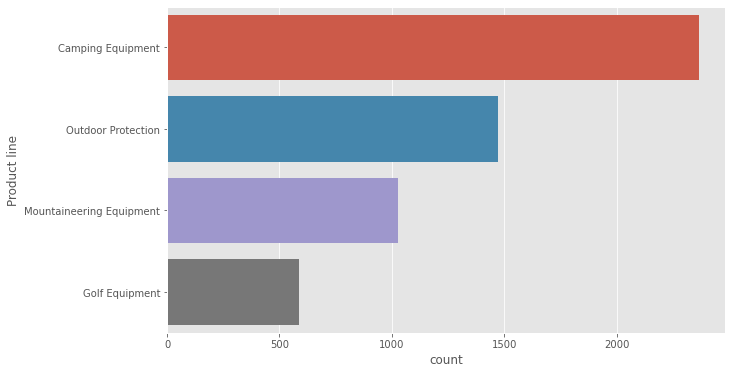

In [23]:
## Now, we can save the result in a dataframe and use it for different 
## purpose e.g. visualization, etc.

sales04 = sales.loc[sales['Year'] == 2004,].sort_values(by= "Gross profit").reset_index()

# use sales04 to plot the count plot for 'Product'
sns.countplot(data = sales04, 
              y = 'Product line', 
              order = sales04['Product line'].value_counts().index)

In [7]:
## Note that we can sort the full dataset "in place", which means that we don't
## have to assign the sorted dataframe to a new variable after it is sorted. 

# To make sure that the orginial dataframe is sorted, we will use the 'in_place' argument
# as follows

sales04 = sales.loc[sales['Year'] == 2004, ].copy()

sales04.sort_values(by = "Gross profit", ascending=False,inplace = True)

sales04.reset_index(inplace=True,drop=True) # note that we may need to reset the index of the dataframe 

sales04.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.420000,7.00,436595.23,6.510000
1,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.420000,7.00,407650.30,6.510000
2,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.000000,265.14,374923.56,246.580000
3,2004,Camping Equipment,Sleeping Bags,Hibernator Self - Inflating Mat,Telephone,United States,901516.61,1062322.69,575943.00,NaN,69.000000,127.27,325573.61,110.164400
4,2004,Camping Equipment,Cooking Gear,TrailChef Kettle,Telephone,United States,711421.08,607726.80,291881.80,53814.0,5.506667,13.22,315845.00,11.844667


In [25]:
### Note that we make our code more easily readable

### The "\" is needed if we want to chain operations on multiple lines 
### We usually do this to organize our code in a way that we can see it better

sales\
    .loc[sales['Year'] == 2004, ]\
    .sort_values(by = 'Gross profit', ascending = False)\
    .head(3)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


### 5.4.2 Sorting Dataframes based on multiple variables

In [26]:
## Arrage the 2004 sales data by unit price in increasing order. 
## If two sales have the the same unit price value, use quantity 
## to sort them in increasing order.

sales.loc[sales['Year']== 2004,].sort_values(by= ['Unit price', 'Quantity']).head(6)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
9410,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Sales visit,Belgium,2298.48,2298.48,533.80,628.0,0.85,3.66,1764.68,3.66
11290,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,Mexico,2747.70,2832.84,657.90,774.0,0.85,3.66,2089.80,3.55
11383,2004,Camping Equipment,Cooking Gear,TrailChef Cup,E-mail,Spain,2932.30,3023.16,702.10,826.0,0.85,3.66,2230.20,3.55
11387,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Fax,Japan,3035.25,3129.30,726.75,855.0,0.85,3.66,2308.50,3.55
10501,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Fax,United States,3246.42,3148.85,753.95,887.0,0.85,3.66,2394.90,3.55
11291,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,Brazil,3436.40,3542.88,822.80,968.0,0.85,3.66,2613.60,3.55


In [8]:
## Arrage the 2004 sales data by unit price in increasing order. 
## If two sales have the the same unit price value, use quantity 
## to sort them in DECREASING order.

## Notice here that we are soting in increasing order based on unit price, and 
## decreasing order based on quantity

sales\
     .loc[sales['Year']== 2004,]\
     .sort_values(by= ['Unit price', 'Quantity'], ascending = [True, False])\
     .head(6)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10491,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,United States,104269.74,98451.87,24215.65,28489.0,0.85,3.66,74236.22,3.462381
10493,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Web,United States,96583.74,92498.56,22430.65,26389.0,0.85,3.66,70067.91,3.508095
11313,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Web,China,86087.28,91379.22,21221.95,24967.0,0.85,3.66,64865.33,3.450000
11365,2004,Camping Equipment,Cooking Gear,TrailChef Cup,E-mail,Canada,49796.58,52114.74,12103.15,14239.0,0.85,3.66,37693.43,3.499333
10492,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,United Kingdom,49428.30,46983.89,11479.25,13505.0,0.85,3.66,35504.64,3.480714
11378,2004,Camping Equipment,Cooking Gear,TrailChef Cup,E-mail,Germany,43601.30,45834.18,10644.55,12523.0,0.85,3.66,32956.75,3.488462


## 5.5 Creating (Mutating) New Variables

We can mutate/add new variables (column) to the dataframe based on exisiting variables in the data. This is useful when we do feature engineering (i.e. creaing new features/variables based on exisiting variables/features in the dataset. This is helpful in both EDA and machine learning. 

The following are some scenarios for the need to mutate new variables:
    
- a new column with with a standarized variable
- a new column with cummulative sums, cumulative averages, etc. 
- a new column with the ranks of the observations
- a new column with the quantile of an observation based on a given KPI
- a new column based on a condition (if statements)
- etc. 

### 5.5.1 Using `assign()`

In [28]:
## For each year, what is the maximum unit profit (unit cost - unit sale price)?

## we first create a new variable to hold the unit profit 

sales.\
    assign(unitprofit = sales['Unit cost'] - sales['Unit sale price']).\
    groupby('Year').\
    max()

,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,unitprofit
Year,,,,,,,,,,,,,,
2004,Outdoor Protection,Sleeping Bags,TrailChef Water Bag,Web,United States,968870.75,1130591.00,664903.68,106747.0,5473.00,265.14,436595.23,246.58,5360.494000
2005,Outdoor Protection,Sleeping Bags,TrailChef Water Bag,Web,United States,1724470.56,1739201.35,1018670.00,104294.0,5419.00,265.14,645391.92,249.23,5301.472609
2006,Outdoor Protection,Sleeping Bags,TrailChef Water Bag,Web,United States,3644349.30,3477909.78,2061750.00,164142.0,7833.00,265.14,1416159.78,265.14,7716.163600
2007,Camping Equipment,Cooking Gear,TrailChef Water Bag,Web,United States,1593610.36,1677539.04,1028869.92,123775.0,79.56,151.77,564740.44,144.18,29.970000


In [29]:
## For each year, what is the maximum and minimum unit profit (unit cost - unit sale price)?

## we first create a new variable to hold the unit profit 

sales.\
    assign(unitprofit = sales['Unit cost'] - sales['Unit sale price']).\
    groupby('Year').\
    agg({'unitprofit':['max', 'min']})

unitprofit            
              max         min
Year                         
2004  5360.494000 -133.020000
2005  5301.472609 -127.067143
2006  7716.163600 -139.600000
2007    29.970000  -69.180000

### 5.5.2 Using `map()` to update levels (factors) of a categorical variable

In [30]:
sales['Order method type'].unique()

array(['Sales visit', 'Telephone', 'Web', 'Special', 'Mail', 'E-mail',
       'Fax'], dtype=object)

In [31]:
### Create a new variable based on the order method type as follows:

## - If order method is {Telephone, Fax, Mail, Sales visit} then the value is 'Old medium'
## - If order method is {E-mail, Web} then the value is "New medium"
## - If order method is {Special} then the value is "Special medium"

### After, create a count plot to see which medium is the most popular

sales['Medium'] = sales['Order method type'].map({'Telephone': 'Old medium',
                                'Fax': 'Old medium',
                                'Mail': 'Old medium',
                                'Sales visit': 'Old medium',
                                'E-mail': 'New medium',
                                'Web': 'New medium',
                                'Special': 'Special medium'})

sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,Medium
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105,Old medium
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old medium
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210,Old medium
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320,Old medium
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old medium


In [ ]:
#OR using a function
def classify(value):
    if value in ['Telephone','Fax','Mail','Sales visit']:
        return 'Old medium'
    elif value in ['E-mail','Web']:
        return 'New medium'
    else:
        return "Special medium" 
     
sales['MediumA']=[classify(value) for value in sales['Order method type']]
sales.head(10)
    

In [ ]:
#OR
sales['MediumD'] = pd.Series(['Old medium' if i in ['Telephone','Fax','Mail','Sales visit'] else 
                             'New medium' if i in ['E-mail','Web'] else 
                             'Special medium' for i in sales['Order method type']])
sales.head()

<AxesSubplot:xlabel='Medium', ylabel='count'>

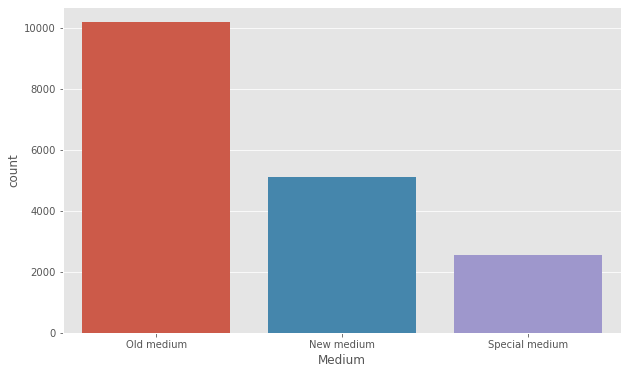

In [32]:
sns.countplot(data = sales, x = 'Medium')

### 5.5.3 Using `map()` to apply a user defined function on a variable

In [33]:
# Create a function that takes a number, and returns its double

def double_value(x):
    return 2*x

# use the function to get the double of 3
double_value(3)

6

In [34]:
# use the function to return the double of the Unit price
# for all sales in the sales data

double_price = sales['Unit price'].map(double_value)

double_price.head()

0    21.28
1      NaN
2    21.28
3    21.28
4      NaN
Name: Unit price, dtype: float64

### 5.5.4 Using `map()` to apply an anonymous function (`lambda` expression) on a variable

In the previous section, we have learned how to defined a Python function that has a name (e.g. double_value). Notice that the function we defined earlier in section 3.3 computes and expression based on input argument. 

In Python, anonymous function means that a function is without a name. As we already know that def keyword is used to define the normal functions and the lambda keyword is used to create anonymous functions. It has the following syntax:

`lambda arguments: expression`

Source: https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/

In [35]:
# Using lambda expressions

# Lambda definition does not include a “return” statement, it always contains an expression which is returned. 
# We can also put a lambda definition anywhere a function is expected, 
# and we don’t have to assign it to a variable at all. 
# This is the simplicity of lambda functions.

# the input to the lambda expression (x) is the value coming from
# the sales['Unit price'], and the output is (2x). 

# notice here that lambda expressions are efficient especially 
# if you don't want to create a seperate function that has a name

# lambda expressions don't stay in Pyhton's working directory like a regular function or variable

sales['Unit price'].map(lambda x: 2*x)

0        21.28
1          NaN
2        21.28
3        21.28
4          NaN
         ...  
17818      NaN
17819      NaN
17820      NaN
17821      NaN
17822      NaN
Name: Unit price, Length: 17823, dtype: float64

In [ ]:
sales['MediumC'] = sales['Order method type'].apply(lambda x: 
                  'Old Medium' if x in ['Telephone','Fax','Mail','Sales visit'] 
                  else 'New Medium' if x in ['E-mail','Web'] 
                  else 'Special Medium')